In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.8.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

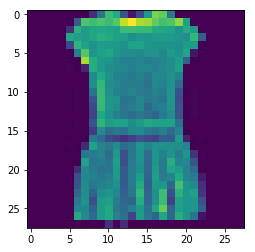

In [4]:
plt.figure()
plt.imshow(train_images[3])

In [5]:
train_images = train_images / 255.0
test_images = test_images /255.0

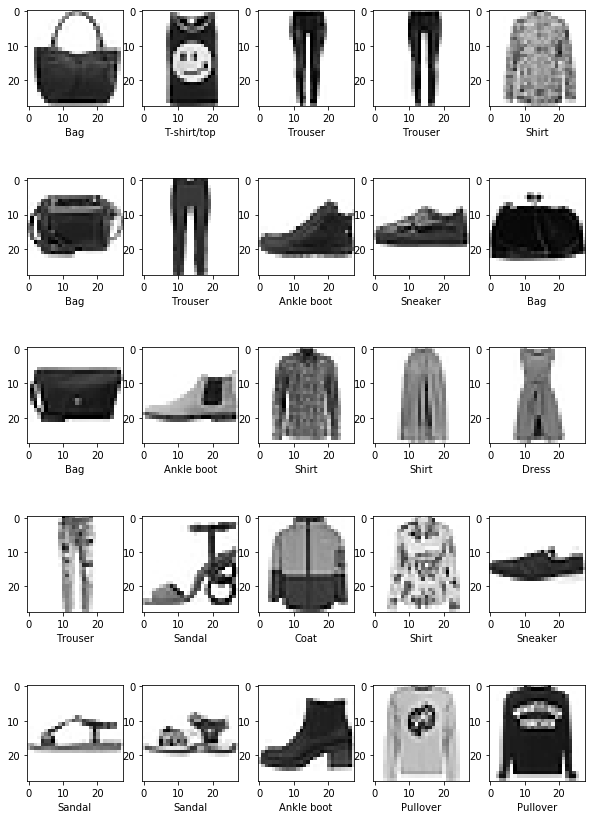

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[100+i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[100+i]])


In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


In [8]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s 89us/step - loss: 0.5248 - acc: 0.8183
Epoch 2/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.4020 - acc: 0.8573
Epoch 3/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3628 - acc: 0.8701
Epoch 4/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.3394 - acc: 0.8778
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.3184 - acc: 0.8835


In [10]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/step
Test accuracy: 0.8723


In [12]:
predictions = model.predict(test_images)
test_labels[np.argmax(predictions[1])]

1

c:\users\lot\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


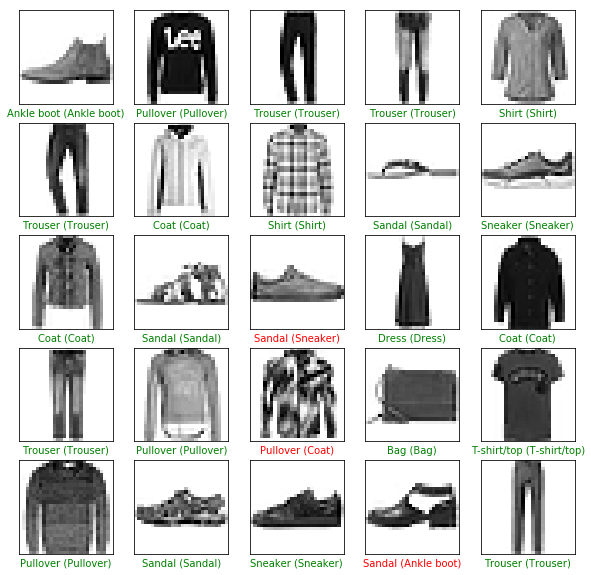

In [13]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color)
